In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
from settings import BASE_DIR

/home/paridhi/AARC/Projects/carla_simulations


In [4]:


def load_data(file_path: str) -> pd.DataFrame:
    full_path = f"{BASE_DIR}/{file_path}"
    df = pd.read_csv(full_path)
    return df

In [5]:
# load recorded data
data = load_data("Reports/sim_data_FS_IDM_avg_ref_speed_nV_6_ref25_f0.02.csv")
data.head(10)

,time,name,x,y,z,speed,acc,gap,ref_velocity,rel_velocity
0,0.02,leader,9500.000000,0.000000e+00,0.496515,0.392000,0.0,NaN,NaN,NaN
1,0.02,car1,9508.599609,0.000000e+00,0.497267,1.093475,0.0,3.999609,0.0,0.0
2,0.02,car2,9517.200195,3.552714e-17,0.497855,1.094162,0.0,4.000586,0.0,0.0
3,0.02,car3,9525.799805,3.552714e-17,0.498601,1.093475,0.0,3.999609,0.0,0.0
4,0.02,car4,9534.400391,3.552714e-17,0.499020,1.094162,0.0,4.000586,0.0,0.0
5,0.02,car5,9543.000000,3.552714e-17,0.499427,1.093475,0.0,3.999609,0.0,0.0
6,0.02,car6,9551.599609,3.552714e-17,0.499711,1.093475,0.0,3.999609,0.0,0.0
7,0.02,car7,9560.200195,3.552714e-17,0.499910,1.094162,0.0,4.000586,0.0,0.0
8,0.04,leader,9500.000000,0.000000e+00,0.495604,0.392000,0.0,NaN,NaN,NaN
9,0.04,car1,9508.599609,0.000000e+00,0.496453,1.093475,0.0,3.999609,0.0,0.0


In [6]:
data.shape

(200000, 10)

In [7]:
custom_colors = [
            "#041e31",
            '#ff7f0e',
            '#2ca02c',
            '#d62728',
            "#7d49ad",
            '#8c564b',
            "#eeb1dc",
            '#bcbd22',
        ]

In [8]:
def plot_time_vs_specific_col(df,x_col,y_col,title, start_time, end_time):
    lower_limit = int(start_time / 0.02)
    upper_limit = int(end_time / 0.02)
    print(f"Plotting from step {lower_limit} to {upper_limit} (time {start_time} to {end_time})")
    df = df.iloc[lower_limit:upper_limit]
    print(f"Data shape after slicing: {df.shape}")
    plt.figure(figsize=(12, 6))

    color_idx = 0
    for label, group in df.groupby('name'):
        color = custom_colors[color_idx % len(custom_colors)]
        color_idx += 1
        plt.plot(group[x_col], group[y_col], label=label, color=color)
    
    # plt.plot(df[x_col], df[y_col], alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()


Plotting from step 0 to 150000 (time 0 to 3000)
Data shape after slicing: (150000, 10)


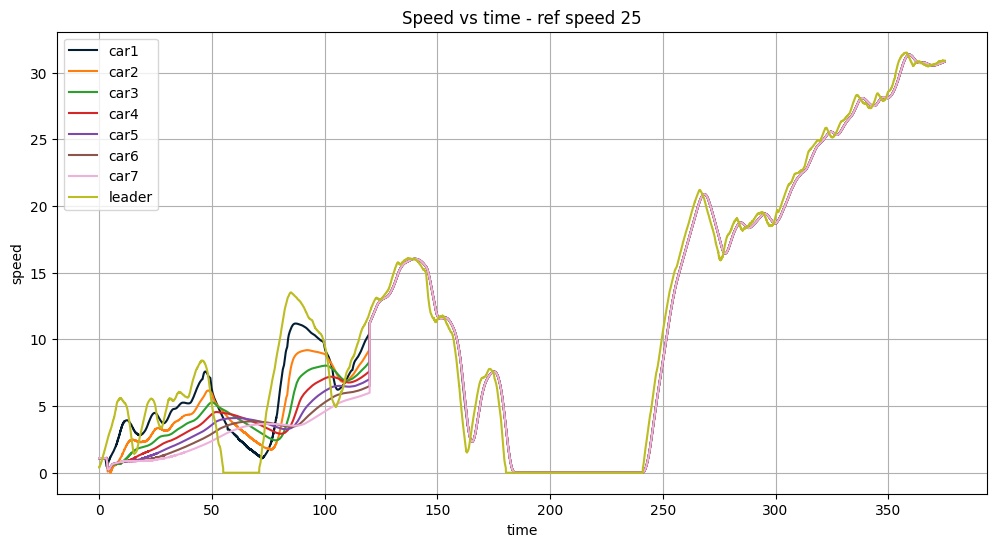

In [9]:
plot_time_vs_specific_col(data,'time','speed','Speed vs time - ref speed 25', start_time=0 , end_time=3000)

Plotting from step 0 to 150000 (time 0 to 3000)
Data shape after slicing: (150000, 10)


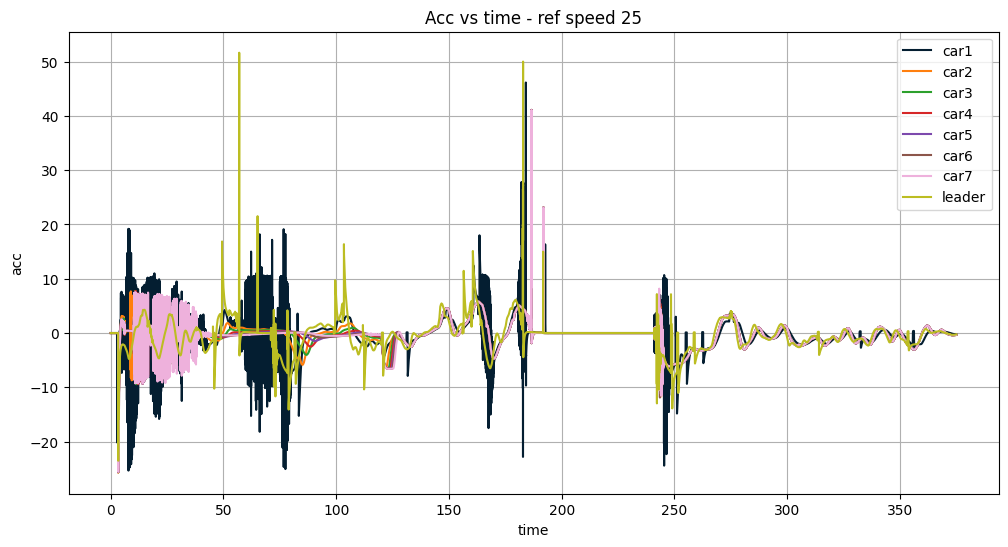

In [10]:
plot_time_vs_specific_col(data,'time','acc','Acc vs time - ref speed 25', start_time=0, end_time=3000)

## Plot Relative Speed

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_relative_speeds(df, x_col, y_col, title, start_time=0, end_time=100):

    lower_limit = int(start_time / 0.02)
    upper_limit = int(end_time / 0.02)
    print(f"Plotting from step {lower_limit} to {upper_limit} (time {start_time} to {end_time})")
    df_filtered = df.iloc[lower_limit:upper_limit]

    # # Filter data by time window
    # df_filtered = df[(df[x_col] >= start_time) & (df[x_col] <= end_time)]

    # Pivot data to wide format: time as index, name as columns
    pivot_df = df_filtered.pivot(index=x_col, columns='name', values=y_col).dropna()

    # Sort columns so followers are in order
    vehicle_names = sorted(pivot_df.columns, key=lambda x: (x != 'leader', x))

    # Plot relative speed
    plt.figure(figsize=(12, 6))
    for i in range(1, len(vehicle_names)):
        leader = vehicle_names[i - 1]
        follower = vehicle_names[i]
        rel_speed = pivot_df[leader] - pivot_df[follower]
        plt.plot(pivot_df.index, rel_speed, label=f'{follower} rel to {leader}')

    plt.xlabel(x_col)
    plt.ylabel('Relative Speed (m/s)')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Plotting from step 0 to 150000 (time 0 to 3000)


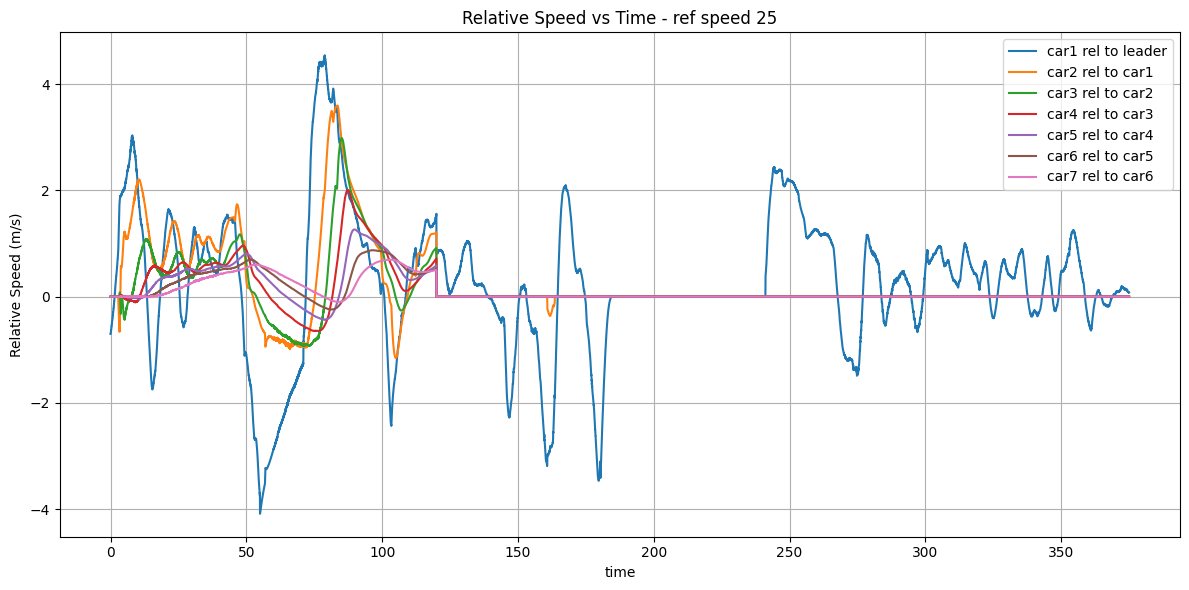

In [12]:
plot_relative_speeds(data, 'time', 'speed', 'Relative Speed vs Time - ref speed 25', start_time=0, end_time=3000    )

In [ ]:
def plot_time_vs_specific_col_without_leader(df,x_col,y_col,title, start_time, end_time):
    lower_limit = int(start_time / 0.02)
    upper_limit = int(end_time / 0.02)
    print(f"Plotting from step {lower_limit} to {upper_limit} (time {start_time} to {end_time})")
    df = df.iloc[lower_limit:upper_limit]
    print(f"Data shape after slicing: {df.shape}")
    plt.figure(figsize=(12, 6))

    color_idx = 0
    for label, group in df.groupby('name'):
        color = custom_colors[color_idx % len(custom_colors)]
        color_idx += 1
        plt.plot(group[x_col], group[y_col], label=label, color=color)
    
    # plt.plot(df[x_col], df[y_col], alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

In [47]:
# plot_time_vs_specific_col(data,'time','gap','Headway vs time - ref speed 25', start_time = 0.0 , end_time=3000)

Plotting from step 0 to 250000 (time 0.0 to 5000)
Data shape after slicing: (250000, 12)


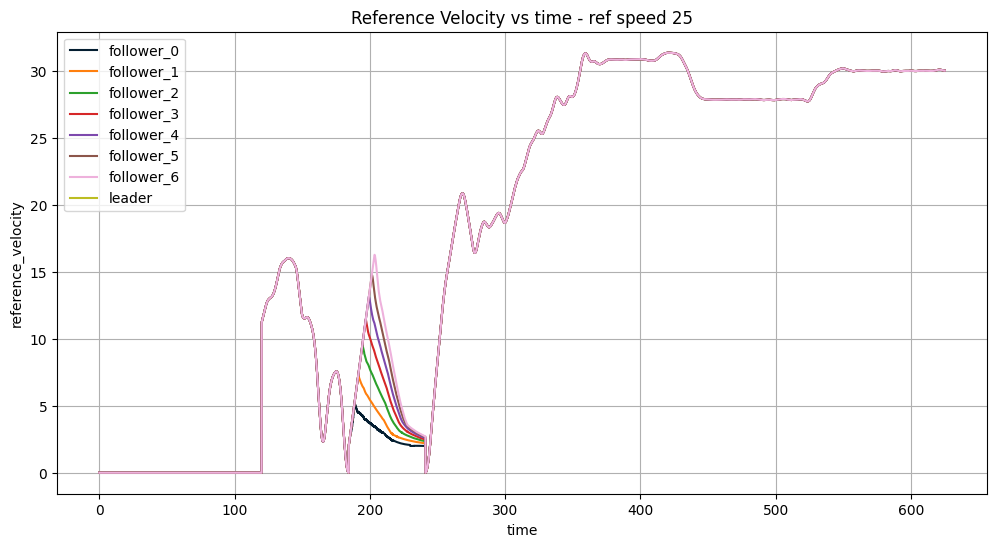

In [48]:
plot_time_vs_specific_col(data,'time', 'reference_velocity', 'Reference Velocity vs time - ref speed 25', start_time = 0.0 , end_time=5000)

# Plot command velocity vs gap distribution


In [28]:
def plot_command_velocity(data: pd.DataFrame, max_points: int = 1000, min_points: int = 0):

    # data = data.head(max_points)  # Limit to max_points for clarity
    # filter follower vehicles only
    data = data[data['name'] != 'leader']
    data = data.iloc[min_points:max_points]  # Start from min_points if specified
    plt.figure(figsize=(12, 6))
    for label, group in data.groupby('name'):
        if label != 'follower_2':
            if label == 'follower_0':
                data['command_velocity'] = data['command_velocity'] * 1.5
            else:
                data['command_velocity'] = data['command_velocity']
            plt.plot(group['time'], group['command_velocity'], label=f'cmd velocity {label}',)
            plt.plot(group['time'], group['reference_velocity'], linestyle='--', alpha=0.5 , label=f'Reference Velocity - {label}')
            plt.plot(group['time'], group['gap'], linestyle=':', alpha=0.5 , label=f'Gap - {label}')
    
    plt.title('Command Velocity vs Gap')
    plt.xlabel('Time (m)')
    plt.ylabel('Command Velocity (m/s)')
    plt.grid(True)
    plt.legend()
    # plt.xlim(0, data['gap'].max() + 5)
    # plt.ylim(0, data['speed'].max() + 5)
    plt.show()

/tmp/ipykernel_180256/3338251676.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


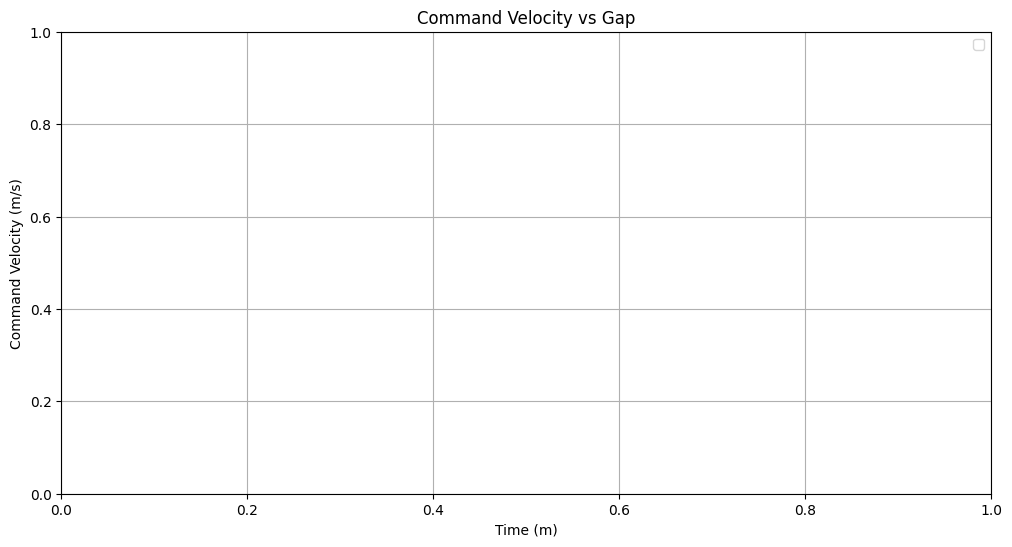

In [29]:
plot_command_velocity(data,5000,10000)

## Plot speed and time graph

In [13]:
def plot_follower_speed_profile(df, num_follower, follower, start_time: float = None, end_time: float = 0):
    
    # Slice the data range
    min_points = int(start_time / 0.02)
    max_points = int(end_time / 0.02)
    if follower !='leader':
        for i in range(1, num_follower+1):
            follower_name = f"follower_{i}"
        
            if i <= 1:
                imm_leader_name = 'leader'
                # leader_data = df[df['name'] == 'leader']
            else:
                imm_leader_name = f'follower_{i-1}'
            
            leader_data = df[df['name'] == imm_leader_name]
            # amplify the leader speed for better visualization
            # leader_data['speed'] = leader_data['speed'] * 1.2
            
            follower_data = df[df['name'] == follower_name]
            
            if follower_data.empty:
                print(f"[Warning] No data found for follower: {follower_name}")
                return
            if max_points is not None:
                follower_data = follower_data.iloc[min_points:max_points]
                leader_data = leader_data.iloc[min_points:max_points]
                # immediate_leader = 
            else:
                follower_data = follower_data.iloc[min_points:]

            plt.figure(figsize=(10, 6))
            
            plt.plot(leader_data['time'], leader_data['speed'], label=f'{imm_leader_name} Speed', color='red',linewidth=1.5)
            plt.plot(follower_data['time'], follower_data['speed'], label=follower_name)
            # plt.plot(follower_data['time'], follower_data['command_velocity'], label=f"{follower_name} Command Velocity", linestyle='--')
            plt.plot(follower_data['time'], follower_data['reference_velocity'], label=f"{follower_name} Reference Velocity", linestyle=':')
            plt.plot(follower_data['time'], follower_data['gap'], label=f"{follower_name} Gap", linestyle='-.')
            plt.xlabel('Time (s)')
            plt.ylabel('Speed (m/s)')
            if i<=0:
                plt.title(f'Speed Profile of {follower_name} and leader {imm_leader_name}')
            else:
                plt.title(f'Speed Profile of follower_{i+1} and leader {i}')
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            plt.show()
    else:
        follower_name = 'leader'
        follower_data = df[df['name'] == follower_name]
        if follower_data.empty:
            print(f"[Warning] No data found for follower: {follower_name}")
            return
        if max_points is not None:
            follower_data = follower_data.iloc[min_points:max_points]
        else:
            follower_data = follower_data.iloc[min_points:]

        plt.figure(figsize=(10, 6))
        
        plt.plot(follower_data['time'], follower_data['speed'], label=follower_name, color='red')
        plt.xlabel('Time (s)')
        plt.ylabel('Speed (m/s)')
        plt.title(f'Speed Profile of {follower_name}')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


In [14]:
plot_follower_speed_profile(data, num_follower=8, follower='follower', start_time=0.0, end_time=5000)

[Warning] No data found for follower: follower_1


## plot time space diagram

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_time_space_diagram(csv_path, start_time=None, end_time=None):
    # Load data
    df = pd.read_csv(csv_path)
    x_max = df['x'].max()
    x_min = df['x'].min()
    df['x'] = x_max - df['x']  # Remaps [x_min, x_max] to [x_max - x_min, 0]


    # Optional time filtering
    if start_time is not None:
        df = df[df['time'] >= start_time]
    if end_time is not None:
        df = df[df['time'] <= end_time]

    # Plot
    plt.figure(figsize=(12, 6))
    for vehicle_name in df['name'].unique():
        vehicle_df = df[df['name'] == vehicle_name]
        plt.plot(vehicle_df['time'], vehicle_df['x'], label=vehicle_name)

    plt.xlabel("Time (s)")
    plt.ylabel("Longitudinal Position (x in meters)")
    plt.title("Time-Space Diagram")
    plt.legend(loc='upper right', ncol=2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


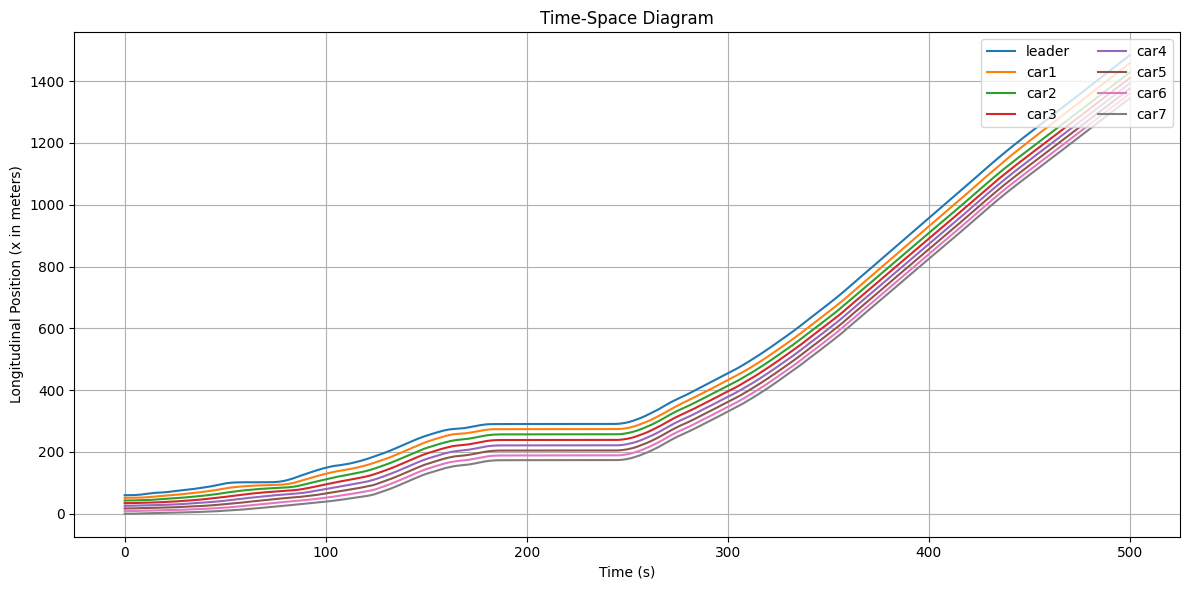

In [16]:
data_path = 'Reports/sim_data_FS_IDM_avg_ref_speed_nV_6_ref25_f0.02.csv'
plot_time_space_diagram(data_path, start_time=0, end_time=1000)

## Reformate data

In [47]:
data_path = 'Reports/sim_data_IDM_sim_5_nV_11_ref25_f0.02.csv'

In [48]:
# Keep specific columns from the dataframe and save to a new CSV
def ilter_and_save_data(data_path: str, columns_to_keep: list):
    data = load_data(data_path)
    data_filtered = data[columns_to_keep]
    data_filtered['x'] = 10000 - data_filtered['x']  # Remap x to start from 0
    
    output_path = f"Report_IDM/{data_path.split('/')[-1]}"
    print(f"Saving filtered data to: {output_path}")
    data_filtered.to_csv(output_path, index=False)
    print(data_filtered.head())


In [49]:
columns_to_keep = ['time', 'name', 'x', 'speed']
ilter_and_save_data(data_path, columns_to_keep)

/tmp/ipykernel_13297/1788514827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['x'] = 10000 - data_filtered['x']  # Remap x to start from 0


Saving filtered data to: Report_IDM/sim_data_IDM_sim_5_nV_11_ref25_f0.02.csv
   time    name           x     speed
0  0.02  leader  500.000000  0.392000
1  0.02    car1  491.400391  1.093475
2  0.02    car2  482.799805  1.094162
3  0.02    car3  474.200195  1.093475
4  0.02    car4  465.599609  1.094162
